In [118]:
import numpy as np
import pandas as pd
import glob
from smith_waterman import algs
from Bio import SeqIO
import matplotlib.pyplot as plt
from sklearn import metrics
import importlib
import random

Run this is algs was updated in order to get the most up to date version

In [401]:
importlib.reload(algs)

<module 'smith_waterman.algs' from '/Users/ijones1/Documents/HW3_skeleton/smith_waterman/algs.py'>

Implement the Smith-Waterman algorithm and instrument the code such that it can use any scoring matrix provided (i.e. will read it in from a separate file). You may adapt code you can obtain from the Web (there are a number implementations you can find). But you must demonstrate your understanding of the algorithm with detailed comments. 

In [366]:
D=algs.readMatrix('BLOSUM62')
print('The score of a match is...')
print(D[('R','R')])
g = 3 # gap penalty
e = 1 # extention penalty
algs.sw_new('RRR', 'RMRR', g, e, D)

The score of a match is...
5


(12,
 (3, 4),
 array(['R', '-', 'R', 'R'], dtype='<U32'),
 array(['R', 'M', 'R', 'R'], dtype='<U32'))

As you can see the two seq 'RRR', 'RMRR' align to their best match 'R-RR' and 'RMRR' and score a total of 12, which is 5 - 3 (gap)+5+5.

In [367]:
algs.sw_new('RRR', 'RMMRR', g, e, D)

(11,
 (3, 5),
 array(['R', '-', '-', 'R', 'R'], dtype='<U32'),
 array(['R', 'M', 'M', 'R', 'R'], dtype='<U32'))

You can see that the extention penalty is also identified.

In [368]:
algs.sw_new('', '', g, e, D)

(0, (0, 0), array([], dtype=float64), array([], dtype=float64))

Additonally, the smith waterman alg is able to handle empty arrays

Consider the false positive rate (proportion of negative pairs with scores that exceed a score threshold) when the true positive rate (proportion of positive pairs with scores above the threshold) is 0.7. What's the best false positive rate that you can achieve with varying both gap opening (from 1 to 20) and extension penalties (from 1 to 5) with the BLOSUM50 matrix? What is the best gap penalty combination? 

In [363]:
# Read in the dictionary
D=algs.readMatrix('BLOSUM50')

gaps = np.array([])
extend = np.array([])
score = np.array([])
for g in range(1,21):
    for e in range(1,6):
        print(g, e)
        df = algs.test_known(g, e, D)
        s=algs.score_70percent(df)
        fp=algs.false_pos(df, s)
        gaps = np.append(gaps, g)
        extend = np.append(extend, e)
        score = np.append(score,fp)
        
df = pd.DataFrame({'Gap_Score': gaps,'Extend_Score': extend, 'Score': score})
        
        
        

1 1
1 2
1 3
1 4
1 5
2 1
2 2
2 3
2 4
2 5
3 1
3 2
3 3
3 4
3 5
4 1
4 2
4 3
4 4
4 5
5 1
5 2
5 3
5 4
5 5
6 1
6 2
6 3
6 4
6 5
7 1
7 2
7 3
7 4
7 5
8 1
8 2
8 3
8 4
8 5
9 1
9 2
9 3
9 4
9 5
10 1
10 2
10 3
10 4
10 5
11 1
11 2
11 3
11 4
11 5
12 1
12 2
12 3
12 4
12 5
13 1
13 2
13 3
13 4
13 5
14 1
14 2
14 3
14 4
14 5
15 1
15 2
15 3
15 4
15 5
16 1
16 2
16 3
16 4
16 5
17 1
17 2
17 3
17 4
17 5
18 1
18 2
18 3
18 4
18 5
19 1
19 2
19 3
19 4
19 5
20 1
20 2
20 3
20 4
20 5


In [376]:
df[df.Score==min(df.Score)]

,Gap_Score,Extend_Score,Score
37,8.0,3.0,0.22
50,11.0,1.0,0.22


In [378]:
df

,Gap_Score,Extend_Score,Score
0,1.0,1.0,0.36
1,1.0,2.0,0.32
2,1.0,3.0,0.34
3,1.0,4.0,0.34
4,1.0,5.0,0.32
...,...,...,...
95,20.0,1.0,0.40
96,20.0,2.0,0.38
97,20.0,3.0,0.38
98,20.0,4.0,0.38


2. Using the gap penalties you determined from question 1, which of the provided scoring matrices performs the best, in terms of false positive rate (at a true positive rate of 0.7)? What are the performance rates of each of the matrices? Create a Receiver Operator Curve (ROC) graph which shows the fraction of true positives on the Y axis and the fraction of false positives on the X axis. Include on the graph data for each of the provided matrices. Please take care to make your ROC graphs square, with both X and Y axes limited to the range [0:1]. Note, you can download ROC code from here: http://www.jainlab.org/Public/ucsf-roc.zip. It is not guaranteed to be bug free but it might save you some time. 

BLOSUM50
BLOSUM62
PAM100
PAM250
MATIO


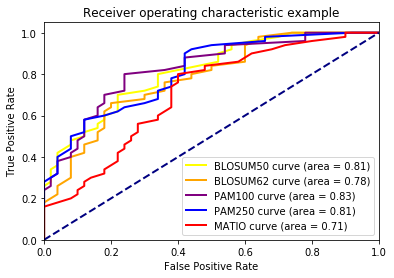

In [58]:
matrix = ['BLOSUM50','BLOSUM62','PAM100','PAM250','MATIO']
g = 11 # determined above
e = 1# determined above

# Make a dataframe for TP
pos=np.array([])
for i in range(50):
    tp = 1-(i/50)
    pos = np.append(pos,tp)
final_df=pd.DataFrame({'TP': pos})

for m in matrix:
    print(m)
    D=algs.readMatrix(m)
    temp_df = algs.test_known(g, e, D) # Makes a df with all pos and neg controls scores
    FP = algs.score(temp_df, m)
    final_df = pd.concat([final_df, FP], axis=1)
    
top_row = pd.DataFrame({'TP':[1],'BLOSUM50':[1],'BLOSUM62':[1],'PAM100':[1],'PAM250':[1],'MATIO':[1]}) # add 100% everytime
bottom_row = pd.DataFrame({'TP':[0],'BLOSUM50':[0],'BLOSUM62':[0],'PAM100':[0],'PAM250':[0],'MATIO':[0]}) # add no positives
# final_df = final_df.insert(0,{'TP':1,'BLOSUM50':1,'BLOSUM62':1,'PAM100':1,'PAM250':1,'MATIO':1}) #Need to fix tomorrow
# final_df = final_df.insert(-1,{'TP':0,'BLOSUM50':0,'BLOSUM62':0,'PAM100':0,'PAM250':0,'MATIO':0}) # Need to fix
final_df = pd.concat([top_row, final_df]).reset_index(drop = True)
final_df= pd.concat([final_df, bottom_row ]).reset_index(drop = True)
# Plot the ROC
plt.figure()
lw = 2
plt.plot(final_df.BLOSUM50, final_df.TP, color='yellow',
         lw=lw, label='BLOSUM50 curve (area = %0.2f)' % metrics.auc(final_df.BLOSUM50, final_df.TP))
plt.plot(final_df.BLOSUM62, final_df.TP, color='orange',
         lw=lw, label='BLOSUM62 curve (area = %0.2f)' % metrics.auc(final_df.BLOSUM62, final_df.TP))
plt.plot(final_df.PAM100, final_df.TP, color='purple',
         lw=lw, label='PAM100 curve (area = %0.2f)' % metrics.auc(final_df.PAM100, final_df.TP))
plt.plot(final_df.PAM250, final_df.TP, color='blue',
         lw=lw, label='PAM250 curve (area = %0.2f)' % metrics.auc(final_df.PAM250, final_df.TP))
plt.plot(final_df.MATIO, final_df.TP, color='red',
         lw=lw, label='MATIO curve (area = %0.2f)' % metrics.auc(final_df.MATIO, final_df.TP))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [472]:
final_df

,TP,BLOSUM50,BLOSUM62,PAM100,PAM250,MATIO
0,1.00,1.00,1.00,1.00,1.00,1.00
1,1.00,0.74,0.74,0.78,0.92,0.90
2,0.98,0.70,0.64,0.78,0.66,0.90
3,0.96,0.62,0.64,0.78,0.66,0.80
4,0.94,0.56,0.60,0.54,0.50,0.72
5,0.92,0.56,0.60,0.54,0.44,0.68
6,0.90,0.52,0.60,0.54,0.42,0.62
7,0.88,0.52,0.60,0.42,0.42,0.60
8,0.86,0.52,0.60,0.42,0.42,0.58
9,0.84,0.46,0.50,0.42,0.42,0.48


3. How does the performance change if you normalize the Smith-Waterman scores by the length of the shortest sequence in a pair (i.e. divide the raw score by the min length)? Show the ROC curves for your best matrix and for the same matrix with normalized scores. Are the false positive rates better or worse? Why do you think this is so? 

PAM100


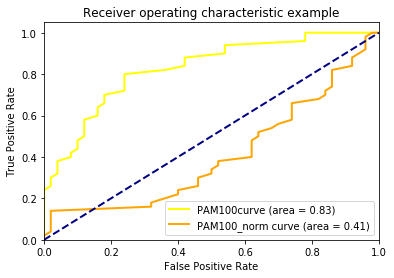

In [382]:
matrix = ['PAM100']
g = 11 # determined above
e = 1# determined above

# Make a dataframe for TP
pos=np.array([])
for i in range(50):
    tp = 1-(i/50)
    pos = np.append(pos,tp)
final_df=pd.DataFrame({'TP': pos})

for m in matrix:
    print(m)
    D=algs.readMatrix(m)
    temp_df = algs.test_known(g, e, D) # Makes a df with all pos and neg controls scores
    FP = algs.score(temp_df, m)
    final_df = pd.concat([final_df, FP], axis=1)
    temp_df_norm = algs.test_known_norm(g, e, D)
    FP_norm = algs.score(temp_df_norm, (m+'_norm'))
    final_df = pd.concat([final_df, FP_norm], axis=1)
    
top_row = pd.DataFrame({'TP':[1],'PAM100':[1],'PAM100_norm':[1]}) # add 100% everytime
bottom_row = pd.DataFrame({'TP':[0],'PAM100':[0],'PAM100_norm':[0]}) # add no positives
# final_df = final_df.insert(0,{'TP':1,'BLOSUM50':1,'BLOSUM62':1,'PAM100':1,'PAM250':1,'MATIO':1}) #Need to fix tomorrow
# final_df = final_df.insert(-1,{'TP':0,'BLOSUM50':0,'BLOSUM62':0,'PAM100':0,'PAM250':0,'MATIO':0}) # Need to fix
final_df = pd.concat([top_row, final_df]).reset_index(drop = True)
final_df= pd.concat([final_df, bottom_row ]).reset_index(drop = True)
# Plot the ROC
plt.figure()
lw = 2
plt.plot(final_df.PAM100, final_df.TP, color='yellow',
         lw=lw, label='PAM100curve (area = %0.2f)' % metrics.auc(final_df.PAM100, final_df.TP))
plt.plot(final_df.PAM100_norm, final_df.TP, color='orange',
         lw=lw, label='PAM100_norm curve (area = %0.2f)' % metrics.auc(final_df.PAM100_norm, final_df.TP))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

The normalized curve has worse false positivie rates as the true positive score is actually lower the the false positive score, meaning that more often a true negative gets a higher score than a true negative. I think this is due to an over correction of length. If you have two long sequence(100bp) with 50% matching, they would score lower than a 10bp sequence completely alligning with one of the 100bp sequences. Thus it is possible that the negative sequences are shorter than the positive sequences. I have not looked into this however.

Using the best gap penalties and matrix from part 1, create an alignment for each positive pair of sequences and each negative pair of sequences. You will use these static alignments as a starting point from which to optimize a scoring matrix to maximize separation of scores of the positive and negative pairs. 

In [64]:
g = 11 # Gap penalty
e = 1 # extention penalty
D=algs.readMatrix('PAM100')
alignment_df = algs.test_known(g, e, D) 
align1 = alignment_df.alignment1 # Fixed allignments based on best sequencing
align2 = alignment_df.alignment2 # Fixed allignments based on best sequencing



In [65]:
alignment_df

,pair1,pair2,score,known,alignment1,alignment2
0,sequences/prot-0004.fa,sequences/prot-0008.fa,25.0,1.0,"[A, W, G, T, A, G, P, E, F]","[A, W, H, E, I, G, R, E, F]"
1,sequences/prot-0031.fa,sequences/prot-0034.fa,32.0,1.0,"[D, D, A, L, K, L, -, -, -, A, N, E, G, K, V, ...","[D, N, I, V, K, L, S, A, A, A, D, A, G, D, L, ..."
2,sequences/prot-0047.fa,sequences/prot-0050.fa,27.0,1.0,"[S, T, L, E, N, F, L, E, R]","[A, T, I, V, E, F, L, N, R]"
3,sequences/prot-0065.fa,sequences/prot-0069.fa,28.0,1.0,"[C, N, A, C, H]","[C, A, A, C, H]"
4,sequences/prot-0077.fa,sequences/prot-0082.fa,53.0,1.0,"[T, I, D, F, P, E, F, L, S, L, M, A, R, K, M, ...","[T, F, D, F, -, -, F, L, D, -, M, N, H, D, G, ..."
...,...,...,...,...,...,...
95,sequences/prot-0843.fa,sequences/prot-0026.fa,24.0,0.0,"[A, R, I, E, N, K, Q, D, I, Q, I, V, K]","[A, K, L, S, N, A, Q, V, I, D, V, T, K]"
96,sequences/prot-0860.fa,sequences/prot-0510.fa,23.0,0.0,"[K, Y, I, H, P]","[K, Y, V, D, P]"
97,sequences/prot-0878.fa,sequences/prot-0524.fa,15.0,0.0,"[G, R, R]","[A, R, R]"
98,sequences/prot-0900.fa,sequences/prot-0264.fa,22.0,0.0,"[R, Y, S, P, K, T]","[K, F, K, P, K, T]"


In [66]:
s = np.array([])
for x in range(len(align1)):
    seq1=align1[x]
    seq2=align2[x]
    score = 0
    for y in range(len(seq1)):
        if seq1[y] == '-':
            if seq1[y-1] == '-':
                score -= e
            else:
                score -= g
        elif seq2[y] == '-':
            if seq2[y-1] == '-':
                score -= e
            else:
                score -= g
        else:
            score += D[(seq1[y],seq2[y])]
    s = np.append(s, score)
    
print(s)

[ 25.  32.  27.  28.  53.  26.  37.  21.  22.  28.  36.  26.  35.  29.
  75.  21.  30.  35.  39.  35.  37.  30.  31.  30.  53.  25.  43.  41.
  28.  28.  33.  29.  31.  39.  29.  33.  32.  32.  26.  25.  28.  31.
  35.  42.  88.  31.  54. 242.  40.  31.  25.  18.  22.  27.  25.  23.
  28.  18.  17.  18.  27.  17.  20.  24.  33.  24.  23.  26.  24.  26.
  27.  29.  23.  32.  27.  20.  25.  26.  28.  25.  34.  27.  27.  35.
  22.  37.  20.  28.  25.  24.  15.  18.  30.  31.  25.  24.  23.  15.
  22.  30.]


This code above which is the same as the get scores command written in algs demonstrates that I am able to accurately traceback the fixed allignments

1. Devise an optimization algorithm to modify the values in a starting score matrix such as to maximize the following objective function: sum of TP rates for FP rates of 0.0, 0.1, 0.2, and 0.3. The maximum value for the objective function is 4.0 (where you are getting perfect separation of positive and negative pairs even at the lowest false positive rate). You should use the gap and extension penalties derived from Part 1. Remember, you must maintain symmetry in your matrix. You can make use of real-valued scores in the matrices if desired (this is probably a good idea). 

In [395]:
align1 = alignment_df.alignment1 # Fixed allignments based on best sequencing
align2 = alignment_df.alignment2 
known = alignment_df.known
D=algs.readMatrix('PAM100')
g = 11
e = 1

testing = algs.get_scores(align1, align2, D, g, e, known) 
algs.get_scores(align1, align2, D, g, e, known) # Get score on set allignments based on matrix

,known,score
0,1.0,25.0
1,1.0,32.0
2,1.0,27.0
3,1.0,28.0
4,1.0,53.0
...,...,...
95,0.0,24.0
96,0.0,23.0
97,0.0,15.0
98,0.0,22.0


In [396]:
# The following takes in a dataframe of pos and neg known allignments and get the true pos rates for the false pos rates of 0, 0.1, 0.2, an
algs.score_neg(testing)

0.0
0.24
0.1
0.72
0.2
1.52
0.3
2.34


2.34

2.34 would be the value of the orignal PAM100 scoring matrix

Run a genetic alg to find opt allignment

START
Generate the initial population
Compute fitness
REPEAT
    Selection
    Crossover
    Mutation
    Compute fitness
UNTIL population has converged
STOP

In [383]:
g = 11 # Gap penalty
e = 1 # extention penalty
D=algs.readMatrix('PAM100')
alignment_df = algs.test_known(g, e, D) 
align1 = alignment_df.alignment1 # Fixed allignments based on best sequencing
align2 = alignment_df.alignment2 
known = alignment_df.known

In [385]:
aa = algs.get_AA() # Get list of amino acids
aa
l = len(aa)-1
pop = algs.ga_init('PAM100') # Read in the initial population

orig_m = algs.readMatrix('PAM100')
# print(pop[0])

# Mutations in the poputation
# pop = algs.ga_mut(pop, aa)

# cause mutation and eval if it is worse ignore, if it is better continue
k = 0
while k < 10:
    for i in range(len(pop)):
        # print(i)
        t = algs.get_scores(align1, align2, pop[i], g, e, known)
        # print(t)
        score = algs.score_neg(t)
        # print(score)
        D_new = algs.ga_mut_test(pop[i], aa)
        t_new = algs.get_scores(align1, align2, D_new, g, e, known)
        # print(t_new)
        score_new = algs.score_neg(t_new)
        # print(score_new)
        if score_new >= score:
            # print('change')
            pop[i] = D_new
        else:
            pop[i] = algs.readMatrix('PAM100')
    k += 1
    
# recover the best matrix
best_s = 0
best_m = 0
for i in range(len(pop)):
    x = pop[i]
    t = algs.get_scores(align1, align2, x, g, e, known)    
    score = algs.score_neg(t)
    if best_s < score:
        print('the best score is...')
        print(score)
        best_s = score
        best_m = x

# print(best_m)
        

        
    
    

the best score is...
2.38
the best score is...
2.4400000000000004
the best score is...
2.48
the best score is...
2.52


The optimizion method above will take a init an array of 200 PAM100 matrixes then 

2. Beginning from the best matrix from above (that which produced the alignments), run your optimization algorithm to maximize the fitness of the new matrix. How much improvement do you see in the fitness? Show the full ROC curves for the original matrix and the optimized matrix. What happens when you now realign the sequences using the new matrix and rescore? Show the new ROC curve following realignment on the same graph as above. Qualitatively discuss how your matrix and your alignments change following optimization. 

In [389]:
g = 11 # Gap penalty
e = 1 # extention penalty
D=algs.readMatrix('PAM100')
alignment_df = algs.test_known(g, e, D) 
align1 = alignment_df.alignment1 # Fixed allignments based on best matrix
align2 = alignment_df.alignment2 # Fixed allignments based on best matrix
known = alignment_df.known # 1 if pos control, zero if negative control
best_m = algs.test('PAM100', align1, align2, g, e, known)
orginal_m = algs.readMatrix('PAM100')

the best score is...
2.36
the best score is...
2.4
the best score is...
2.42
the best score is...
2.46
the best score is...
2.5
the best score is...
2.52


      TP  original  better
0   1.00      1.00    1.00
1   1.00      0.78    0.84
2   0.98      0.78    0.78
3   0.96      0.78    0.76
4   0.94      0.54    0.54
5   0.92      0.54    0.54
6   0.90      0.54    0.54
7   0.88      0.42    0.40
8   0.86      0.42    0.40
9   0.84      0.42    0.40
10  0.82      0.36    0.34
11  0.80      0.24    0.22
12  0.78      0.24    0.22
13  0.76      0.24    0.22
14  0.74      0.24    0.22
15  0.72      0.24    0.22
16  0.70      0.18    0.16
17  0.68      0.18    0.16
18  0.66      0.18    0.16
19  0.64      0.16    0.14
20  0.62      0.16    0.14
21  0.60      0.16    0.14
22  0.58      0.12    0.08
23  0.56      0.12    0.08
24  0.54      0.12    0.08
25  0.52      0.12    0.08
26  0.50      0.12    0.08
27  0.48      0.10    0.08
28  0.46      0.10    0.08
29  0.44      0.10    0.08
30  0.42      0.08    0.08
31  0.40      0.08    0.08
32  0.38      0.04    0.04
33  0.36      0.04    0.04
34  0.34      0.04    0.04
35  0.32      0.04    0.04
3

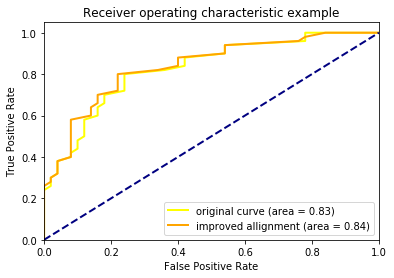

In [397]:
# Make a dataframe for TP
pos=np.array([])
for i in range(50):
    tp = 1-(i/50)
    pos = np.append(pos,tp)
final_df=pd.DataFrame({'TP': pos})

mat = [orig_m, best_m]
names = ['original', 'better']
for i in range(len(mat)):
    t = algs.get_scores(align1, align2, mat[i], g, e, known)
    FP = algs.score(t, names[i])
    final_df = pd.concat([final_df, FP], axis=1)
final_df

top_row = pd.DataFrame({'TP':[1],'original':[1],'better':[1]}) # add 100% everytime
bottom_row = pd.DataFrame({'TP':[0],'original':[0],'better':[0]}) # add no positives
final_df = pd.concat([top_row, final_df]).reset_index(drop = True)
final_df= pd.concat([final_df, bottom_row ]).reset_index(drop = True)
print(final_df)
# Plot the ROC
plt.figure()
lw = 2
plt.plot(final_df.original, final_df.TP, color='yellow',
         lw=lw, label='original curve (area = %0.2f)' % metrics.auc(final_df.original, final_df.TP))
plt.plot(final_df.better, final_df.TP, color='orange',
         lw=lw, label='improved allignment (area = %0.2f)' % metrics.auc(final_df.better, final_df.TP))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

      TP  original  better
0   1.00      1.00    1.00
1   1.00      0.78    0.78
2   0.98      0.78    0.78
3   0.96      0.78    0.78
4   0.94      0.54    0.54
5   0.92      0.54    0.54
6   0.90      0.54    0.54
7   0.88      0.42    0.44
8   0.86      0.42    0.44
9   0.84      0.42    0.44
10  0.82      0.36    0.24
11  0.80      0.24    0.24
12  0.78      0.24    0.24
13  0.76      0.24    0.24
14  0.74      0.24    0.24
15  0.72      0.24    0.18
16  0.70      0.18    0.18
17  0.68      0.18    0.18
18  0.66      0.18    0.18
19  0.64      0.16    0.16
20  0.62      0.16    0.16
21  0.60      0.16    0.16
22  0.58      0.12    0.10
23  0.56      0.12    0.10
24  0.54      0.12    0.10
25  0.52      0.12    0.10
26  0.50      0.12    0.10
27  0.48      0.10    0.08
28  0.46      0.10    0.08
29  0.44      0.10    0.08
30  0.42      0.08    0.08
31  0.40      0.08    0.08
32  0.38      0.04    0.04
33  0.36      0.04    0.04
34  0.34      0.04    0.04
35  0.32      0.04    0.02
3

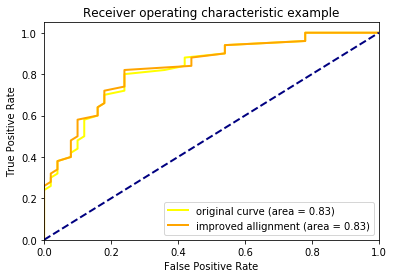

In [398]:
g = 11 # determined above
e = 1# determined above

# Make a dataframe for TP
pos=np.array([])
for i in range(50):
    tp = 1-(i/50)
    pos = np.append(pos,tp)
final_df=pd.DataFrame({'TP': pos})
final_df

mat = [orig_m, best_m]
names = ['original', 'better']
for i in range(len(mat)):
    temp_df = algs.test_known(g, e, mat[i]) # Makes a df with all pos and neg controls scores
    FP = algs.score(temp_df, names[i])
    final_df = pd.concat([final_df, FP], axis=1)

top_row = pd.DataFrame({'TP':[1],'original':[1],'better':[1]}) # add 100% everytime
bottom_row = pd.DataFrame({'TP':[0],'original':[0],'better':[0]}) # add no positives
final_df = pd.concat([top_row, final_df]).reset_index(drop = True)
final_df= pd.concat([final_df, bottom_row ]).reset_index(drop = True)
print(final_df)
# Plot the ROC
plt.figure()
lw = 2
plt.plot(final_df.original, final_df.TP, color='yellow',
         lw=lw, label='original curve (area = %0.2f)' % metrics.auc(final_df.original, final_df.TP))
plt.plot(final_df.better, final_df.TP, color='orange',
         lw=lw, label='improved allignment (area = %0.2f)' % metrics.auc(final_df.better, final_df.TP))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

3. Beginning from the MATIO matrix, but using the same initial sequence alignments, re-run the optimization. Show the same ROC plots as for (2). Discuss the relationship between the results you see here and the results you saw for (2). 

In [339]:
aa = algs.get_AA() # Get list of amino acids
aa
l = len(aa)-1
pop = algs.ga_init('MATIO') # Read in the initial population

orig_m = algs.readMatrix('MATIO')
# print(pop[0])

# Mutations in the poputation
# pop = algs.ga_mut(pop, aa)

# cause mutation and eval if it is worse ignore, if it is better continue
k = 0
while k < 10:
    for i in range(len(pop)):
        # print(i)
        t = algs.get_scores(align1, align2, pop[i], g, e, known)
        # print(t)
        score = algs.score_neg(t)
        # print(score)
        D_new = algs.ga_mut_test(pop[i], aa)
        t_new = algs.get_scores(align1, align2, D_new, g, e, known)
        # print(t_new)
        score_new = algs.score_neg(t_new)
        # print(score_new)
        if score_new >= score:
            # print('change')
            pop[i] = D_new
        else:
            pop[i] = algs.readMatrix('MATIO')
    k += 1
    
# recover the best matrix
best_s = 0
best_m = 0
for i in range(len(pop)):
    x = pop[i]
    t = algs.get_scores(align1, align2, x, g, e, known)    
    score = algs.score_neg(t)
    if best_s < score:
        print('the best score is...')
        print(score)
        best_s = score
        best_m = x

# print(best_m)

the best score is...
0.46
the best score is...
0.52
the best score is...
0.62


In [402]:
g = 11 # Gap penalty
e = 1 # extention penalty
D=algs.readMatrix('PAM100')
alignment_df = algs.test_known(g, e, D) 
align1 = alignment_df.alignment1 # Fixed allignments based on best matrix
align2 = alignment_df.alignment2 # Fixed allignments based on best matrix
known = alignment_df.known # 1 if pos control, zero if negative control
best_m =algs.test('MATIO', align1, align2, g, e, known)
orig_m = algs.readMatrix('MATIO')

the best score is...
0.46
the best score is...
0.48000000000000004
the best score is...
0.54
the best score is...
0.56
the best score is...
0.6000000000000001
the best score is...
0.64


Make ROC for results before redoing allignment...

      TP  original  better
0   1.00      1.00    1.00
1   1.00      1.00    1.00
2   0.98      1.00    1.00
3   0.96      1.00    1.00
4   0.94      1.00    1.00
5   0.92      1.00    0.98
6   0.90      0.98    0.98
7   0.88      0.96    0.96
8   0.86      0.96    0.96
9   0.84      0.96    0.96
10  0.82      0.96    0.96
11  0.80      0.94    0.96
12  0.78      0.94    0.96
13  0.76      0.94    0.96
14  0.74      0.94    0.94
15  0.72      0.94    0.94
16  0.70      0.92    0.94
17  0.68      0.92    0.92
18  0.66      0.92    0.92
19  0.64      0.92    0.92
20  0.62      0.92    0.88
21  0.60      0.92    0.84
22  0.58      0.90    0.82
23  0.56      0.82    0.82
24  0.54      0.80    0.80
25  0.52      0.78    0.80
26  0.50      0.76    0.80
27  0.48      0.76    0.54
28  0.46      0.76    0.44
29  0.44      0.66    0.44
30  0.42      0.58    0.44
31  0.40      0.56    0.44
32  0.38      0.50    0.42
33  0.36      0.46    0.42
34  0.34      0.46    0.40
35  0.32      0.46    0.40
3

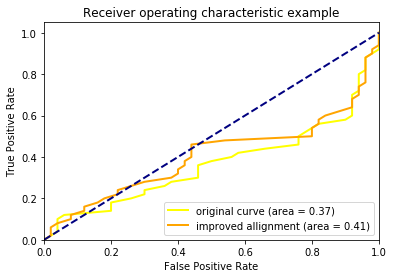

In [403]:


pos=np.array([])
for i in range(50):
    tp = 1-(i/50)
    pos = np.append(pos,tp)
final_df=pd.DataFrame({'TP': pos})

mat = [orig_m, best_m]
names = ['original', 'better']
for i in range(len(mat)):
    t = algs.get_scores(align1, align2, mat[i], g, e, known)
    FP = algs.score(t, names[i])
    final_df = pd.concat([final_df, FP], axis=1)
final_df

top_row = pd.DataFrame({'TP':[1],'original':[1],'better':[1]}) # add 100% everytime
bottom_row = pd.DataFrame({'TP':[0],'original':[0],'better':[0]}) # add no positives
final_df = pd.concat([top_row, final_df]).reset_index(drop = True)
final_df= pd.concat([final_df, bottom_row ]).reset_index(drop = True)
print(final_df)
# Plot the ROC
plt.figure()
lw = 2
plt.plot(final_df.original, final_df.TP, color='yellow',
         lw=lw, label='original curve (area = %0.2f)' % metrics.auc(final_df.original, final_df.TP))
plt.plot(final_df.better, final_df.TP, color='orange',
         lw=lw, label='improved allignment (area = %0.2f)' % metrics.auc(final_df.better, final_df.TP))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Make ROC for results after redoing the alignment

      TP  original  better
0   1.00      1.00    1.00
1   1.00      0.90    0.92
2   0.98      0.90    0.92
3   0.96      0.80    0.82
4   0.94      0.72    0.68
5   0.92      0.68    0.68
6   0.90      0.62    0.64
7   0.88      0.60    0.62
8   0.86      0.58    0.56
9   0.84      0.48    0.46
10  0.82      0.48    0.44
11  0.80      0.40    0.40
12  0.78      0.40    0.40
13  0.76      0.40    0.38
14  0.74      0.38    0.38
15  0.72      0.38    0.38
16  0.70      0.38    0.36
17  0.68      0.38    0.36
18  0.66      0.38    0.36
19  0.64      0.38    0.36
20  0.62      0.36    0.36
21  0.60      0.34    0.36
22  0.58      0.34    0.30
23  0.56      0.28    0.28
24  0.54      0.28    0.24
25  0.52      0.28    0.24
26  0.50      0.26    0.24
27  0.48      0.26    0.22
28  0.46      0.24    0.22
29  0.44      0.24    0.22
30  0.42      0.22    0.22
31  0.40      0.22    0.20
32  0.38      0.22    0.16
33  0.36      0.20    0.16
34  0.34      0.18    0.16
35  0.32      0.18    0.16
3

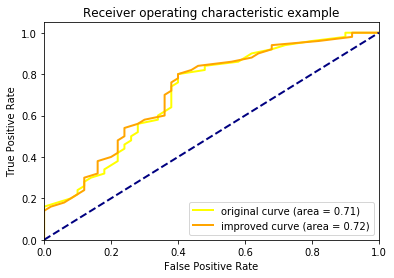

In [340]:
# Results for MATIO
# Make a dataframe for TP
pos=np.array([])
for i in range(50):
    tp = 1-(i/50)
    pos = np.append(pos,tp)
final_df=pd.DataFrame({'TP': pos})
final_df

mat = [orig_m, best_m]
names = ['original', 'better']
for i in range(len(mat)):
    temp_df = algs.test_known(g, e, mat[i]) # Makes a df with all pos and neg controls scores
    FP = algs.score(temp_df, names[i])
    final_df = pd.concat([final_df, FP], axis=1)

top_row = pd.DataFrame({'TP':[1],'original':[1],'better':[1]}) # add 100% everytime
bottom_row = pd.DataFrame({'TP':[0],'original':[0],'better':[0]}) # add no positives
final_df = pd.concat([top_row, final_df]).reset_index(drop = True)
final_df= pd.concat([final_df, bottom_row ]).reset_index(drop = True)
print(final_df)
# Plot the ROC
plt.figure()
lw = 2
plt.plot(final_df.original, final_df.TP, color='yellow',
         lw=lw, label='original curve (area = %0.2f)' % metrics.auc(final_df.original, final_df.TP))
plt.plot(final_df.better, final_df.TP, color='orange',
         lw=lw, label='improved curve (area = %0.2f)' % metrics.auc(final_df.better, final_df.TP))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

4. Describe your optimization algorithm briefly. How might you improve it? 

My optimization will make three random mutation to a matrix by adding or subtracting up to 3 for an Amino Acids pair score into a list of 200 matrix. If the new mutation don't improve the scoring compared to the original matrix it is reverted into the original matrix. This is repeated 20 times. At the end the matirx with the best score is return.

This method is limited. It would be better to have a more complete genetic algorithm that retains the more competive population and generates progeny though cross over events. If this occured it is possible that a better matrix could be made.

5. What would be required in order to make a convincing case that an optimized matrix will be of general utility and will actually be beneficial for people to use in searching databases? 